# **Importing dependencies**

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Image Processing

**Convert images to numpy arrays**

Done in traing in Extracting train notebook

Exporting the process image of numpyarray in data from extracting-train notebook

In [2]:
# Load the data
loaded_data = np.load('/kaggle/input/extracting-train/training_data.npz')

# Access the NumPy array
data = loaded_data['data']

# **Analyzing the train set**

In [3]:
image_count = data.shape[0]
print('Number of images: ', image_count)

Number of images:  50000


**Displaying the images**

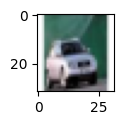

In [4]:
#display an image
img = data[9998]
plt.figure(figsize=(2,1))
plt.imshow(img)

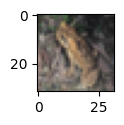

In [5]:
#display an image
img = data[10012]
plt.figure(figsize=(2,1))
plt.imshow(img)

# **Labels Processing**

In [6]:
labels_df = pd.read_csv('/kaggle/input/cifar-10/trainLabels.csv')

In [7]:
labels_df.shape

(50000, 2)

In [8]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [9]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [10]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [11]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


Labels are marked serially by id and evenly distributed ( below )

In [12]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [13]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [14]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [15]:
len(labels)

50000

In [16]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


In [17]:
len(labels)

50000

Checking labels correctness:

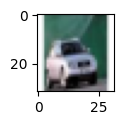

In [18]:
img = data[9998]
plt.figure(figsize=(2,1))
plt.imshow(img)

In [19]:
labels_df[labels_df['id'] == 9999]

,id,label
9998,9999,automobile


In [20]:
labels[9998] # automobile = 1 , and 0 base indexing in List

1

In [21]:
id_list = list(labels_df['id'])

In [22]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


# **Train Test Split**

In [23]:
type(data)

numpy.ndarray

In [24]:
len(data)

50000

In [25]:
type(data[0])

numpy.ndarray

In [26]:
data[0].shape

(32, 32, 3)

In [27]:
# convert image list and label list to numpy arrays

x = data
y = np.array(labels)

In [28]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


In [29]:
# Swap the last two dimensions
x = np.swapaxes(x, -1, -3)

In [30]:
type(x)

numpy.ndarray

In [31]:
print(x.shape)
print(y.shape)

(50000, 3, 32, 32)
(50000,)


In [32]:
# small data for testing while naking the model
# x = x[:1000]
# y = y[:1000]

In [33]:
x[0]

array([[[ 59,  16,  25, ..., 208, 180, 177],
        [ 43,   0,  16, ..., 201, 173, 168],
        [ 50,  18,  49, ..., 198, 186, 179],
        ...,
        [158, 123, 118, ..., 160, 184, 216],
        [152, 119, 120, ...,  56,  97, 151],
        [148, 122, 109, ...,  53,  83, 123]],

       [[ 62,  20,  24, ..., 170, 139, 144],
        [ 46,   0,   7, ..., 153, 123, 129],
        [ 48,   8,  27, ..., 161, 144, 142],
        ...,
        [132,  88,  84, ..., 133, 148, 184],
        [125,  83,  84, ...,  31,  62, 118],
        [124,  87,  73, ...,  34,  53,  92]],

       [[ 63,  20,  21, ...,  96,  96, 116],
        [ 45,   0,   0, ...,  34,  42,  94],
        [ 43,   0,   8, ...,  26,  30,  87],
        ...,
        [108,  55,  50, ...,  70,  94, 140],
        [102,  50,  50, ...,   7,  34,  84],
        [103,  57,  42, ...,  20,  34,  72]]], dtype=uint8)

In [34]:
print(x.shape)
print(y.shape)

(50000, 3, 32, 32)
(50000,)


In [35]:
x_train, x_mid, y_train, y_mid = train_test_split(x, y, test_size=0.2, random_state=2)

In [36]:
x_val, x_test, y_val, y_test = train_test_split(x_mid, y_mid, test_size=0.5, random_state=2)

In [37]:
print(x.shape, x_train.shape, x_test.shape)

(50000, 3, 32, 32) (40000, 3, 32, 32) (5000, 3, 32, 32)


In [38]:
# scaling the data

x_train_scaled = x_train/255

x_test_scaled = x_test/255

x_val_scaled = x_val/255

In [39]:
x_train_scaled[0]

array([[[0.81960784, 0.82352941, 0.80784314, ..., 0.49803922,
         0.56862745, 0.54117647],
        [0.83529412, 0.83529412, 0.81960784, ..., 0.54117647,
         0.58039216, 0.54901961],
        [0.85490196, 0.85490196, 0.83529412, ..., 0.55294118,
         0.53333333, 0.53333333],
        ...,
        [0.49803922, 0.48627451, 0.48627451, ..., 0.61960784,
         0.68627451, 0.58823529],
        [0.47843137, 0.4745098 , 0.51372549, ..., 0.63137255,
         0.62745098, 0.56862745],
        [0.45490196, 0.48235294, 0.51372549, ..., 0.53333333,
         0.56078431, 0.54901961]],

       [[0.82352941, 0.82352941, 0.80392157, ..., 0.42352941,
         0.50980392, 0.50196078],
        [0.83921569, 0.83921569, 0.81960784, ..., 0.47843137,
         0.52941176, 0.51764706],
        [0.85882353, 0.8627451 , 0.84313725, ..., 0.49803922,
         0.49803922, 0.51372549],
        ...,
        [0.29019608, 0.2745098 , 0.2745098 , ..., 0.58431373,
         0.68235294, 0.60392157],
        [0.2

# Covert the train and test data( Numpy array) into torch tensor

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, TensorDataset

In [41]:
x_train_scaled = torch.tensor(x_train_scaled, dtype=torch.float32)
x_test_scaled = torch.tensor(x_test_scaled, dtype=torch.float32)
x_val_scaled = torch.tensor(x_val_scaled, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)

# Building the model class using pretrained VGG16

In [42]:
class model_VGG16(nn.Module):
    def __init__(self, num_classes):
        super(model_VGG16, self).__init__()
        # Load pre-trained VGG16 model
        vgg16_model = models.vgg16(weights='IMAGENET1K_V1')
        
        # Modify the first convolutional layer to accept the specified number of input channels
        self.features = vgg16_model.features
#         self.features[0] = nn.Conv2d(num_input_channels, 64, kernel_size=3, padding=1)
        
        
        # Additional layers similar to the ResNet50 model
        self.additional_layers = nn.Sequential(
            nn.Flatten(),
            nn.BatchNorm1d(512), # 128 -> 512
            nn.Linear(512, 512), # 128x128 -> 512x512
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.BatchNorm1d(512), # 128 -> 512
            nn.Linear(512, num_classes), # 128 -> 512
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.additional_layers(x)
        return x

# Instantiating the model, loss function, optimizer

In [43]:
# Instantiate the VGG16 model with additional layers
num_of_classes = 10 
model = model_VGG16(num_of_classes)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 82.9MB/s]


In [44]:

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [45]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=2e-5)

# Model train

In [46]:
# Convert data to PyTorch DataLoader
train_dataset = TensorDataset(x_train_scaled, y_train)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)

In [47]:
# for inputs, labels in train_loader:
#         inputs, labels = inputs.to(device), labels.to(device)
        
#         print(inputs.shape)

In [48]:
val_accuracy = []
train_accuracy = []

In [49]:
print(x_train_scaled.shape)
print(y_train.shape)

torch.Size([40000, 3, 32, 32])
torch.Size([40000])


Epoch [1/10], Train Accuracy: 0.6600, Validation Accuracy: 0.6816
Epoch [2/10], Train Accuracy: 0.7400, Validation Accuracy: 0.7684
Epoch [3/10], Train Accuracy: 0.7800, Validation Accuracy: 0.7964
Epoch [4/10], Train Accuracy: 0.8800, Validation Accuracy: 0.8154
Epoch [5/10], Train Accuracy: 0.8500, Validation Accuracy: 0.8198
Epoch [6/10], Train Accuracy: 0.8800, Validation Accuracy: 0.8266
Epoch [7/10], Train Accuracy: 0.8700, Validation Accuracy: 0.8252
Epoch [8/10], Train Accuracy: 0.9200, Validation Accuracy: 0.8298
Epoch [9/10], Train Accuracy: 0.9600, Validation Accuracy: 0.8366
Epoch [10/10], Train Accuracy: 0.8900, Validation Accuracy: 0.8386


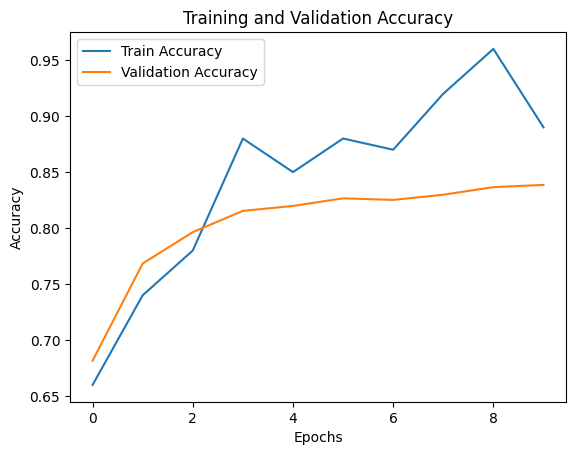

In [50]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)  # No need to specify dim when using class indices
        loss.backward()
        optimizer.step()

    # Evaluation on validation set
    model.eval()
    with torch.no_grad():
        
        # Calculate training accuracy
        _, train_pred = torch.max(outputs, 1)
        train_acc = torch.sum(train_pred == labels).item() / len(labels)
        train_accuracy.append(train_acc)
        
        # x_val_scaled and y_val are validation data
        
        x_val_scaled, y_val = x_val_scaled.to(device), y_val.to(device)

        # Forward pass
        val_outputs = model(x_val_scaled)
        val_loss = criterion(val_outputs, y_val)

        # Calculate accuracy
        _, val_pred = torch.max(val_outputs, 1)
        val_acc = torch.sum(val_pred == y_val).item() / len(y_val)
        val_accuracy.append(val_acc)

    # Print and store metrics
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}')

# Plot accuracy
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()


# Model Evaluation with different metrics and plot

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score

Test Accuracy: 0.8382
Test F1 Score: 0.8360



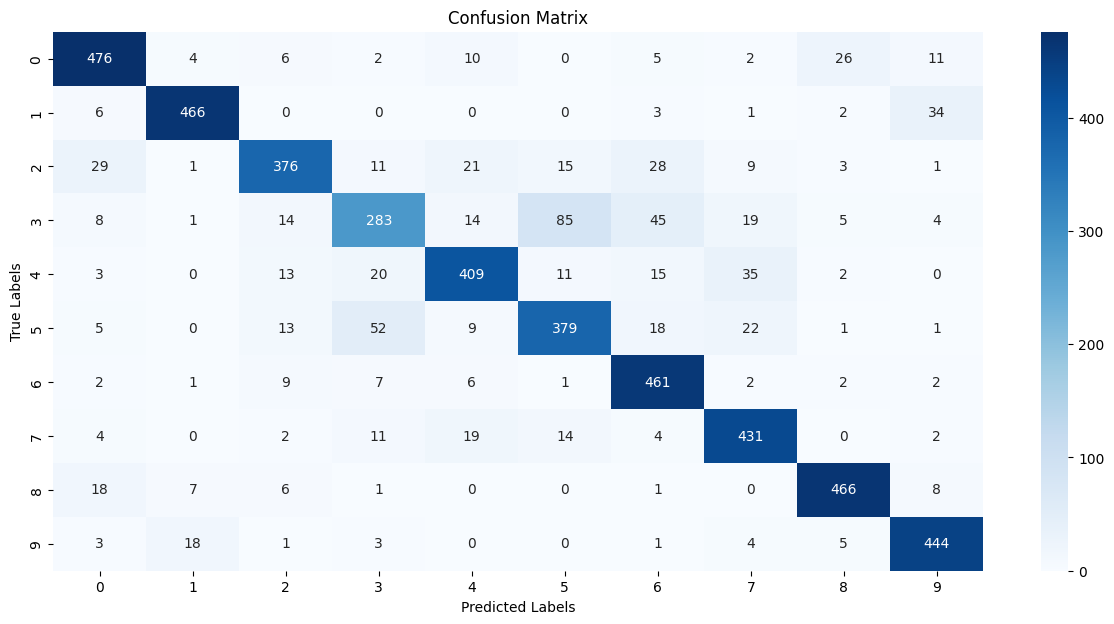

In [52]:
model.eval()
with torch.no_grad():
    x_test_scaled, y_test = x_test_scaled.to(device), y_test.to(device)

    # Forward pass on test set
    test_outputs = model(x_test_scaled)

    # Calculate predictions and confusion matrix
    _, test_pred = torch.max(test_outputs, 1)
    conf_mat = confusion_matrix(y_test.cpu().numpy(), test_pred.cpu().numpy())
    
    # Calculate test accuracy
    test_acc = accuracy_score(y_test.cpu().numpy(), test_pred.cpu().numpy())

    # Calculate F1 score
    test_f1 = f1_score(y_test.cpu().numpy(), test_pred.cpu().numpy(), average='weighted')

# Print test accuracy and F1 score
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test F1 Score: {test_f1:.4f}\n')

# Plot confusion matrix
plt.figure(figsize=(15, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()

# Saving the model

In [53]:
# Save the model state dictionary
torch.save(model.state_dict(), '/kaggle/working/CIFAR_resnet_model.pth')